In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os, shutil, pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory
import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
base_dir = pathlib.Path("data")


train_ds = image_dataset_from_directory(
    base_dir / "train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
)

val_ds = image_dataset_from_directory(
    base_dir / "val",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
)

test_ds = image_dataset_from_directory(
    base_dir / "test",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
)

NotFoundError: Could not find directory data/train

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(include_top=False, weights='imagenet', input_shape=(64, 64, 3))

for layer in conv_base.layers:
    layer.trainable = False

In [ ]:
inputs = keras.Input(shape=(64, 64, 3))
x = keras.layers.Lambda(
     lambda x: keras.applications.vgg16.preprocess_input(x), output_shape=(64, 64, 3))(inputs)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = Dense(256, activation = 'relu')(x)
x = Dropout(.5)(x)
outputs = Dense(16, activation = 'softmax')(x)

model = Model(inputs, outputs)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Define model checkpoint callback to save the best model based on validation loss
model_checkpoint = ModelCheckpoint(filepath="best_model_cnn.keras", save_best_only=True, monitor="val_accuracy")

# Combine both callbacks
callbacks = [early_stopping, model_checkpoint]

In [ ]:
history = model.fit(train_ds, epochs=25, validation_data=val_ds,callbacks=[callbacks])

Epoch 1/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.4315 - loss: 7.0060 - val_accuracy: 0.7566 - val_loss: 0.8192
Epoch 2/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.7124 - loss: 1.0182 - val_accuracy: 0.8042 - val_loss: 0.6411
Epoch 3/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.7683 - loss: 0.7805 - val_accuracy: 0.8329 - val_loss: 0.5737
Epoch 4/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 458s 2s/step - accuracy: 0.8302 - loss: 0.5904 - val_accuracy: 0.8361 - val_loss: 0.6010
Epoch 5/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.8399 - loss: 0.5585 - val_accuracy: 0.8567 - val_loss: 0.4876
Epoch 6/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.8681 - loss: 0.4302 - val_accuracy: 0.8691 - val_loss: 0.5154
Epoch 7/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 202s 992ms/step - accuracy: 0.8916 - loss: 0.3646 - val_accuracy: 0.8643 - val_loss: 0.5737
Epoch 8/25
203/203 ━━━━━━━━━━━━━━━━━━━━ 138s 680ms/step - accuracy: 0.9034 - loss: 0.3338 - va

In [ ]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(train_ds)
print('Training accuracy:', train_acc)

203/203 ━━━━━━━━━━━━━━━━━━━━ 105s 514ms/step - accuracy: 0.9365 - loss: 0.1934
Training accuracy: 0.9435968399047852


In [ ]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(val_ds)
print('Validation accuracy:', val_acc)

58/58 ━━━━━━━━━━━━━━━━━━━━ 30s 516ms/step - accuracy: 0.8571 - loss: 0.4934
Validation accuracy: 0.8566792607307434


## Accuracy Visualization

### Training set Accuracy

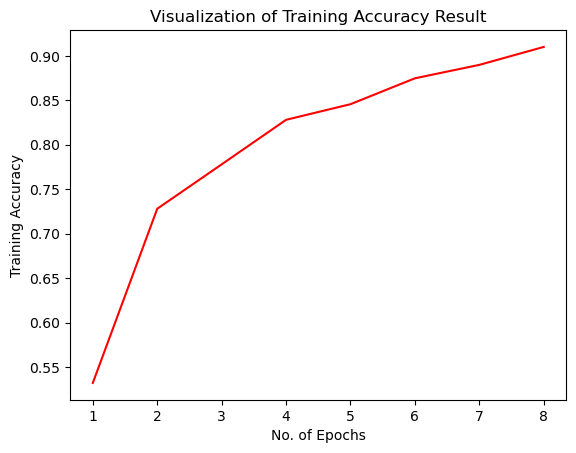

In [ ]:
epochs = [i for i in range(1,9)]
plt.plot(epochs,history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


### Validation set Accuracy

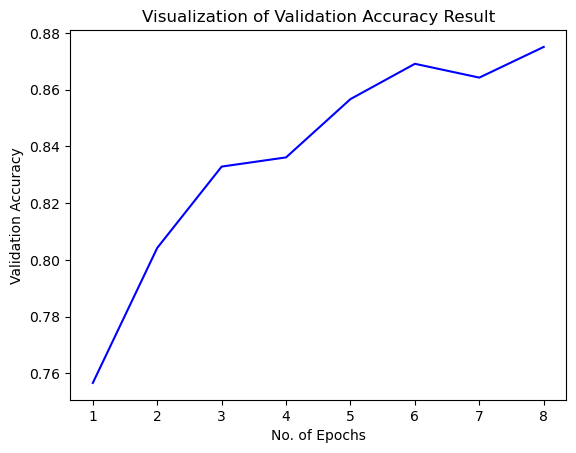

In [ ]:
plt.plot(epochs,history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [ ]:
cnn=tf.keras.models.load_model('best_model_cnn.keras',safe_mode=False)


C:\Users\jaymo\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 66 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


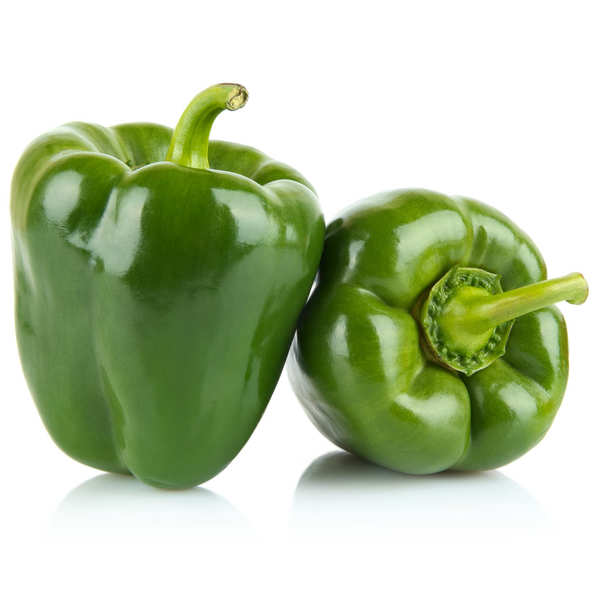

In [ ]:
from PIL import Image
from IPython.display import display

img_path = "C:\\Users\\jaymo\\Capstone\\object classification\\images\\38827-0w600h600_Organic_Fresh_Green_Peppers.jpg"
img = Image.open(img_path)
display(img)

In [ ]:
image = tf.keras.preprocessing.image.load_img(img_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [ ]:
with open('C:\\Users\\jaymo\\Capstone\\object classification\\labels.txt') as f:
  content = f.readlines()

labels=[]

for i in content:
  labels.append(i[:-1])
labels

['Fresh Apple',
 'Rotten Apple',
 'Fresh Banana',
 'Rotten Banana',
 'Fresh Carrot',
 'Rotten Carrot',
 'Fresh Cucumber',
 'Rotten Cucumber',
 'Fresh Mango',
 'Rotten Mango',
 'Fresh Orange',
 'Rotten Orange',
 'Fresh Pepper',
 'Rotten Pepper',
 'Fresh Potato',
 'Rotten Potato']

In [ ]:
result_index = np.argmax(predictions) #Return index of max element
labels[result_index]

'Fresh Pepper'